In [1]:
from presto_mod.pulsed import pulse_test

ModuleNotFoundError: No module named '_base'

In [2]:
import pulse_test as pt

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from datetime import datetime, timedelta
import time
import pyvisa

import os
Global_data_adress = r"C:\Users\nano-y-admin\Documents\Python Scripts\Data"
exp_name = 'Pulsed_measurements_test'
file_folder = Global_data_adress+'\\'+exp_name
if not os.path.exists(file_folder):
  os.mkdir(file_folder)
  print("Folder %s created!" % file_folder)
else:
  print("Folder %s already exists" % file_folder)

Folder C:\Users\nano-y-admin\Documents\Python Scripts\Data\Pulsed_measurements_test already exists


In [2]:
%matplotlib qt

# Connect Presto

In [3]:
presto_address = "169.254.3.14"  # your Presto IP address

[2.57675711e-18 1.26641655e-14 2.28973485e-11 1.52299797e-08
 3.72665317e-06 3.35462628e-04 1.11089965e-02 1.35335283e-01
 6.06530660e-01 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.000000

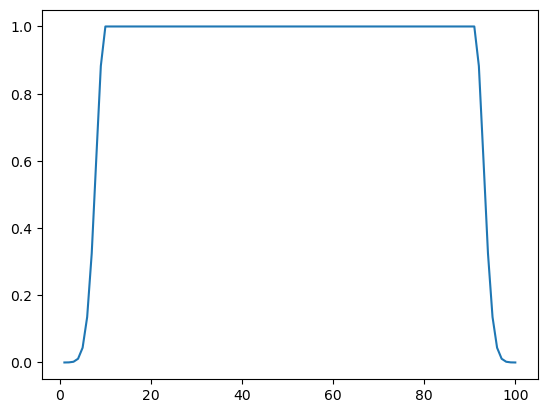

In [61]:
nr_samples = 100
edge = 10
t = np.linspace(1,nr_samples,nr_samples)

def gate(t, start, stop):
    return np.heaviside(t-start, 1) - np.heaviside(t-stop, 1)

def gaussian(t, cent, sig, start, end):
    Result = np.zeros(int(t[-1]))
    Result[start:end] = np.exp(-np.power((t[start:end] - cent) / sig, 2.0) / 2)
    return Result
    
# def sin2(nr_of_samples, start=0, stop=9, sig_feft=2, sig_right=0.001): 
#     t = np.linspace(0, 10, number_of_samples)
#     return gate(t, start, stop) + gaussian(t, cent=start, sig=sig_feft)*(1-np.heaviside(t-start, 1)) + gaussian(t, cent=stop, sig=sig_right)*(np.heaviside(t-stop, 1))

def Gauss(nr_samples,edge,sig_left=2,sig_right=0.001):
    t = np.linspace(1, nr_samples, nr_samples, endpoint=True)
    Left = gaussian(t, edge, sig_left, 0, edge)
    Middle = gate(t, edge+1, t[-edge])
    Right = gaussian(t, int(t[-edge]), sig_right,int(t[-edge-1]),int(t[-1]))
    return Left + Middle + Right

def sin2(nr_samples: int, drag: float = 0.0) -> np.ndarray:
    x = np.linspace(0.0, 1.0, nr_samples, endpoint=False)
    return np.sin(np.pi * x) ** 2

# plt.plot(t, sin2(100))
plt.plot(t, Gauss(nr_samples,edge,2,2))
print(Gauss(nr_samples,edge,1,1))

In [13]:
# t = np.linspace(0, 10, 1000)
# fft_result = np.fft.fft(pulse(t, start=1, stop=9, sig_feft=0.2, sig_right=0.2))
# freqs = np.fft.fftfreq(len(fft_result))

# for i in range(len(fft_result)):
#     if freqs[i] < -0.013 or freqs[i] > 0.013: 
#         fft_result[i] = 1

# pulse_fixed = np.fft.ifft(fft_result)
# plt.plot(pulse_fixed[1:])

# Pulse

In [14]:
omega2 = 11.66e9
lo_freq = (11.66e9 - 0.388e9)/2
if_freq  = omega2-lo_freq

delay = 300e-9
control_duration=700e-9

experiment = pt.T1(
        LO_port=3, # LO
        IF_port=1, # IF
        Readout_port=4,  # READOUT
        save_ = False,
        file_folder = file_folder,
        file_name = 'Pulse_test_pulse_duration',
        
        readout_freq=lo_freq,
        readout_amp=0.6,
        readout_duration=control_duration+delay,
        
        control_freq=if_freq,
        control_amp = 1,
        control_duration=control_duration,             # pulse duration
        
        sample_duration=control_duration+delay*3,
        delay=delay,
        
        wait_delay=4e-6,
        readout_sample_delay=0e-9,
        num_averages=1000000,
        envelope_function = sin2, 
    
    )

In [15]:
att_list = experiment.run(presto_address)
data = att_list['data'][0,0,:]

Run finished


In [16]:
plt.plot(data)

# Pulse duration sweep

In [329]:
omega2 = 11.66e9
lo_freq = (11.66e9 - 0.388e9)/2
if_freq  = omega2-lo_freq

delay = 200e-9
control_duration=800e-9

experiment = pt.T1(
        readout_port=3, # LO
        control_port=1, # IF
        sample_port=3,  # READOUT
        save_ = True,
        file_folder = file_folder,
        file_name = 'Pulse_test_pulse_duration',
        
        readout_freq=lo_freq,
        readout_amp=0.6,
        readout_duration=1500e-9+delay-200e-9,
        
        control_freq=if_freq,
        control_amp = 1,
        control_duration=control_duration,             # pulse duration
        
        sample_duration=readout_duration,
        delay=delay,
        
        wait_delay=4e-6,
        readout_sample_delay=0e-9,
        num_averages=10000000,
        envelope_function = sin2, 
    
    )

In [330]:
amp_array = np.linspace(20e-9, 1500e-9, 16)
t_arr =  np.arange(0, experiment.sample_duration, 1e-9) 
experiment_data = np.zeros((len(amp_array), len(t_arr)), dtype = np.complex64)


start_time = time.time()
start_struct = time.localtime(start_time)
print(f"Measurement started at: {time.strftime('%H:%M:%S', start_struct)}")

for i in range(len(amp_array)):
    experiment.control_duration = amp_array[i]
    att_list = experiment.run(presto_address)
    data = att_list['data'][0,:]
    experiment_data[i] = data

stop_time = time.time()
stop_struct = time.localtime(stop_time)
print(f"Measurement stopped at: {time.strftime('%H:%M:%S', stop_struct)}")

duration = stop_time - start_time
duration_struct = time.gmtime(duration)
print(f"Measurement duration: {time.strftime('%H:%M:%S', duration_struct)}")


print('____________________')
for key in att_list.keys():
    if not isinstance(att_list[key], (float, int, str)):
        print(key, '-->', att_list[key].shape)

data = experiment_data
t_arr = experiment.t_arr
sweep = amp_array

Measurement started at: 16:46:47
Data is saved to  C:\Users\nano-y-admin\Documents\Python Scripts\Data\Pulsed_measurements_test\Pulse_test_pulse_duration--2024.10.11__16.47.39.mat
Data is saved to  C:\Users\nano-y-admin\Documents\Python Scripts\Data\Pulsed_measurements_test\Pulse_test_pulse_duration--2024.10.11__16.48.32.mat
Data is saved to  C:\Users\nano-y-admin\Documents\Python Scripts\Data\Pulsed_measurements_test\Pulse_test_pulse_duration--2024.10.11__16.49.24.mat
Data is saved to  C:\Users\nano-y-admin\Documents\Python Scripts\Data\Pulsed_measurements_test\Pulse_test_pulse_duration--2024.10.11__16.50.17.mat
Data is saved to  C:\Users\nano-y-admin\Documents\Python Scripts\Data\Pulsed_measurements_test\Pulse_test_pulse_duration--2024.10.11__16.51.10.mat
Data is saved to  C:\Users\nano-y-admin\Documents\Python Scripts\Data\Pulsed_measurements_test\Pulse_test_pulse_duration--2024.10.11__16.52.02.mat
Data is saved to  C:\Users\nano-y-admin\Documents\Python Scripts\Data\Pulsed_measurem

In [332]:
font = {'size'   : 15}
matplotlib.rc('font', **font)
fig, ax = plt.subplots(figsize=(15,13))

data_amp= np.abs(np.real(data[:,:])+1j*np.imag(data[:,:]))

c = ax.pcolor( sweep, t_arr*1e9, data_amp.T, cmap = 'viridis')
fig.colorbar(c, ax=ax)
ax.set_ylabel('time, ns')
ax.set_xlabel('Amplitude')

Text(0.5, 0, 'Amplitude')

# Run Pulse test

In [179]:
omega2 = 11.66e9
lo_freq = (11.66e9 - 0.388e9)/2
if_freq  = omega2-lo_freq



delay = 518e-9
control_duration=800e-9

experiment = pt.T1(
        readout_port=3, # LO
        control_port=1, # IF
        sample_port=3,  # READOUT
        save_ = False,
        file_folder = file_folder,
        # file_name = 'run1',
        
        readout_freq=lo_freq,
        readout_amp=0.6,
        readout_duration=control_duration+delay-200e-9,
        
        control_freq=if_freq,
        control_amp = 1,
        control_duration=control_duration,             # pulse duration
        
        sample_duration=readout_duration+control_duration+20e-9,
        delay=delay,
        
        wait_delay=10e-6,
        readout_sample_delay=0e-9,
        num_averages=1000000,
        envelope_function = sin2, 
    
    )

In [7]:
amp_array = np.linspace(0., 1, 6)
t_arr =  np.arange(0, experiment.sample_duration, 1e-9) 
experiment_data = np.zeros((len(amp_array), len(t_arr)), dtype = np.complex64)

for i in range(len(amp_array)):
    experiment.control_amp = amp_array[i]
    att_list = experiment.run(presto_address)
    data = att_list['data'][0,:]
    experiment_data[i] = data
    
 
print('____________________')
for key in att_list.keys():
    if not isinstance(att_list[key], (float, int, str)):
        print(key, '-->', att_list[key].shape)

data = experiment_data
t_arr = experiment.t_arr
sweep = amp_array

Run finished
Run finished
Run finished
Run finished
Run finished
Run finished
____________________
delay --> (1,)
wait_delay --> (1,)
readout_sample_delay --> (1,)
t_arr --> (800,)
data --> (1, 1, 800)
control_envelope_function --> (400,)


Text(0.5, 0, 'delay, ns')

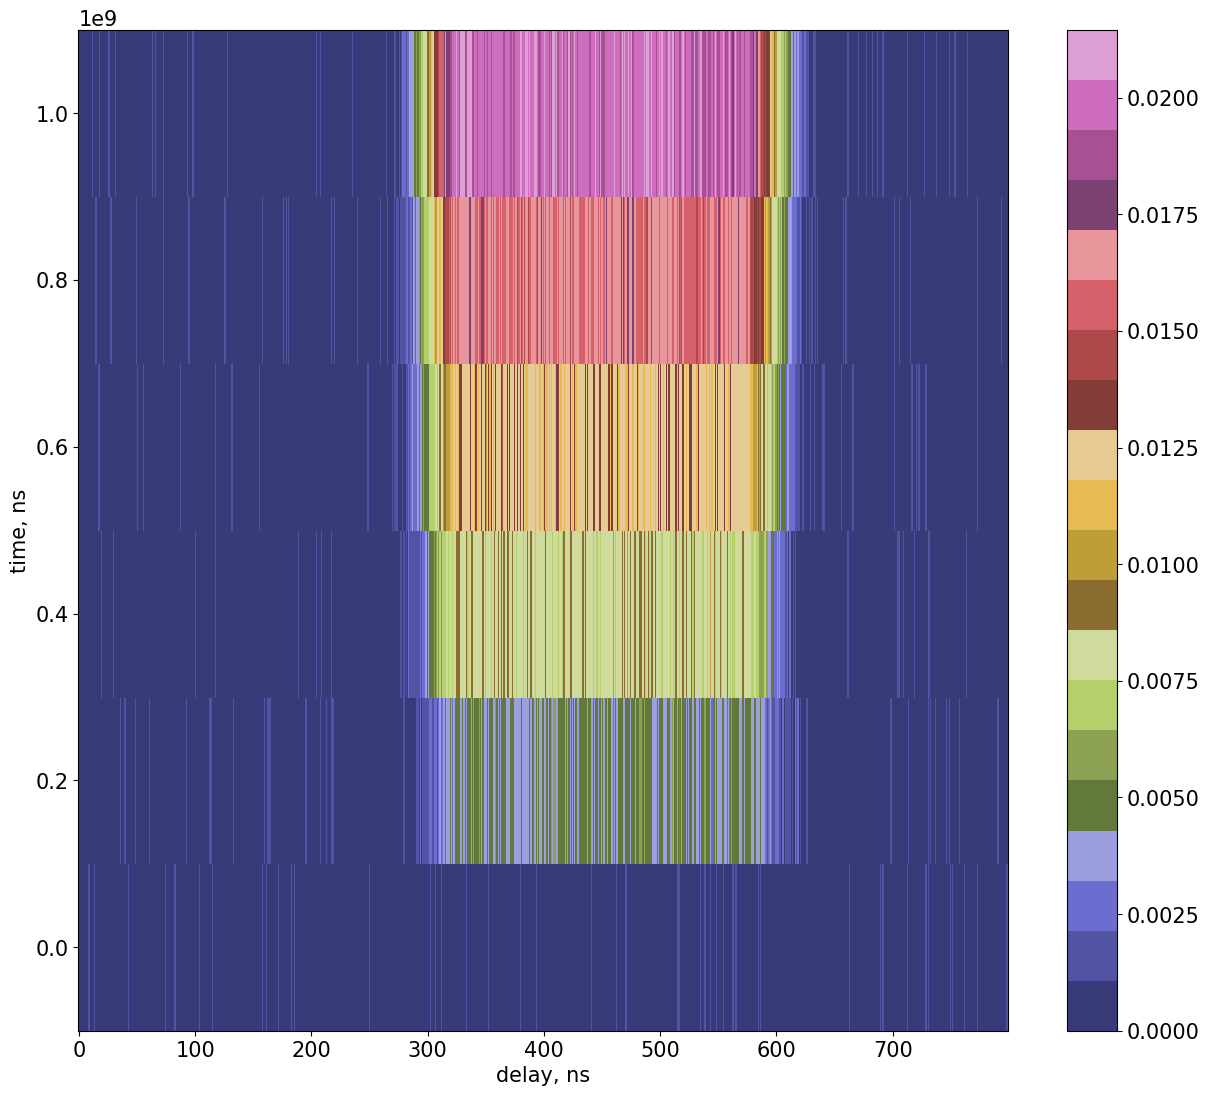

In [8]:
font = {'size'   : 15}
matplotlib.rc('font', **font)
fig, ax = plt.subplots(figsize=(15,13))

data_amp= np.abs(np.real(data[:,:])+1j*np.imag(data[:,:]))

c = ax.pcolor(t_arr*1e9, sweep*1e9, data_amp, cmap = 'tab20b')
fig.colorbar(c, ax=ax)
ax.set_ylabel('time, ns')
ax.set_xlabel('delay, ns')

In [12]:
font = {'size'   : 15}
matplotlib.rc('font', **font)

fig, ax = plt.subplots(figsize=(15,5), sharex = False)
ax.set_title('time')
ax.grid()
for i in range(len(sweep)): 
    data_amp= np.abs(np.real(data[i])+1j*np.imag(data[i]))
    ax.plot(t_arr, data_amp,linewidth = 2)


C:\ProgramData\anaconda3\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\ProgramData\anaconda3\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


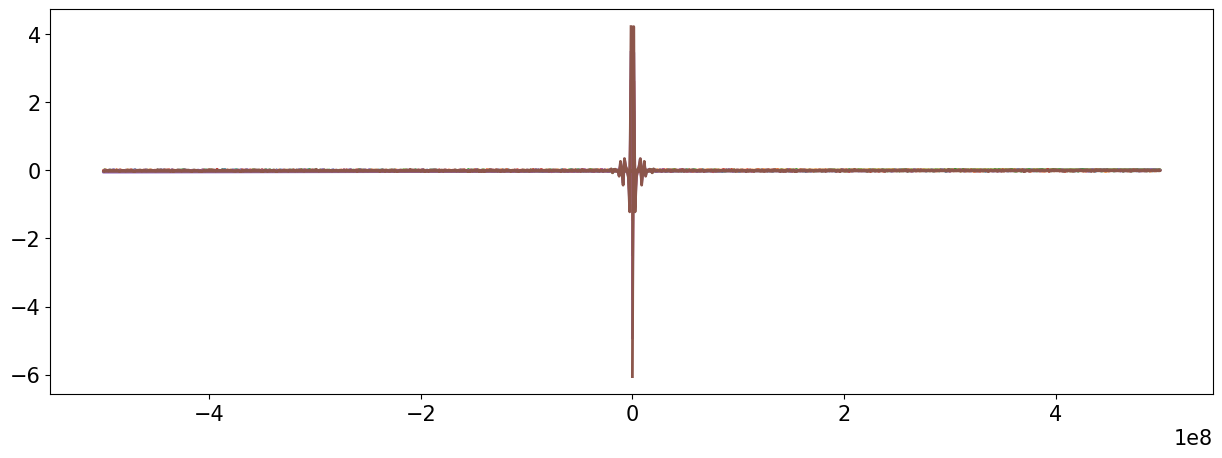

In [10]:
# Perform the FFT
# %matplotlib qt
font = {'size'   : 15}
matplotlib.rc('font', **font)

fig, ax = plt.subplots(figsize=(15,5), sharex = False)

for i in range(len(sweep)): 
    
    fft_result = (np.fft.fft(data[i]))
    freqs = np.fft.fftfreq(len(fft_result), 1/1e9)
    ax.plot(freqs, fft_result, linewidth = 2)